In [1]:
import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [5]:
trial = "instanceType_suite_1"
df, spec = dataset.load(bucket="perfd", 
                  app_name="memcached",
                  trial=trial)
df = dataset_tool.add_ins_feature(df, "serverInstanceType")
with pd.option_context('display.max_rows', None, 'display.max_columns',None):
    display(df.sort_values("serverInstanceType"))

,level_0,index,numServerInstance,numClientInstance,serverInstanceType,clientInstanceType,keySize,valueSize,serverThread,clientThread,runTime,waitTime,warmupTime,debug,avg_lat_read,std_lat_read,min_lat_read,99th_lat_read,rx_goodput,tx_goodput,tenancy,Compute_Units_(ECU),GPUs,FPGAs,ECU_per_vCPU,Clock_Speed(GHz),Intel_AVX,Intel_AVX2,Intel_Turbo,Instance_Storage:_already_warmed-up,Instance_Storage:_SSD_TRIM_Support,EBS_Optimized:_Max_Bandwidth,EBS_Optimized:_Throughput,EBS_Optimized:_Max_16K_IOPS,EBS_Exposed_as_NVMe,Enhanced_Networking,IPv6_Support,EBS_Optimized_surcharge,EMR_cost
96,96,96,1,1,c5.2xlarge,c5.xlarge,30,200,8,1,10,2,2,False,70.8,6.5,60.2,81.5,3.3,0.5,dedicated,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
62,62,62,1,1,c5.2xlarge,c5.xlarge,30,200,8,1,10,2,2,False,72.3,15.4,54.8,89.2,3.3,0.5,dedicated,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
63,63,63,1,1,c5.2xlarge,c5.xlarge,30,200,8,1,10,2,2,False,69.6,6.9,54.8,83.5,3.4,0.5,dedicated,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
68,68,68,1,1,c5.2xlarge,c5.xlarge,30,200,8,1,10,2,2,False,69.2,8.1,54.8,92.9,3.4,0.5,dedicated,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
69,69,69,1,1,c5.2xlarge,c5.xlarge,30,200,8,1,10,2,2,False,69.6,7.2,54.8,84.0,3.4,0.5,dedicated,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
70,70,70,1,1,c5.2xlarge,c5.xlarge,30,200,8,1,10,2,2,False,69.0,6.0,54.8,83.2,3.4,0.5,dedicated,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
71,71,71,1,1,c5.2xlarge,c5.xlarge,30,200,8,1,10,2,2,False,69.5,7.3,54.8,81.1,3.4,0.5,dedicated,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
76,76,76,1,1,c5.2xlarge,c5.xlarge,30,200,8,1,10,2,2,False,69.6,7.2,54.8,83.4,3.4,0.5,dedicated,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
77,77,77,1,1,c5.2xlarge,c5.xlarge,30,200,8,1,10,2,2,False,70.6,8.2,60.2,83.2,3.3,0.5,dedicated,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085
60,60,60,1,1,c5.2xlarge,c5.xlarge,30,200,8,1,10,2,2,False,68.6,7.2,54.8,84.8,3.4,0.5,dedicated,34.0,0.0,0.0,4.250,3.0,1.0,1.0,1.0,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.085


adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+-----------+-----+-----+-----+------+-------+-----+------+--------+-------+
|   False   |  lr | knn |  rf | svm  | svm_k |  nn | best | oracle | naive |
+-----------+-----+-----+-----+------+-------+-----+------+--------+-------+
| memcached | 5.5 | 5.6 | 5.6 | 29.9 |  6.2  | 5.5 | 5.5  |  5.5   |  40.5 |
+-----------+-----+-----+-----+------+-------+-----+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

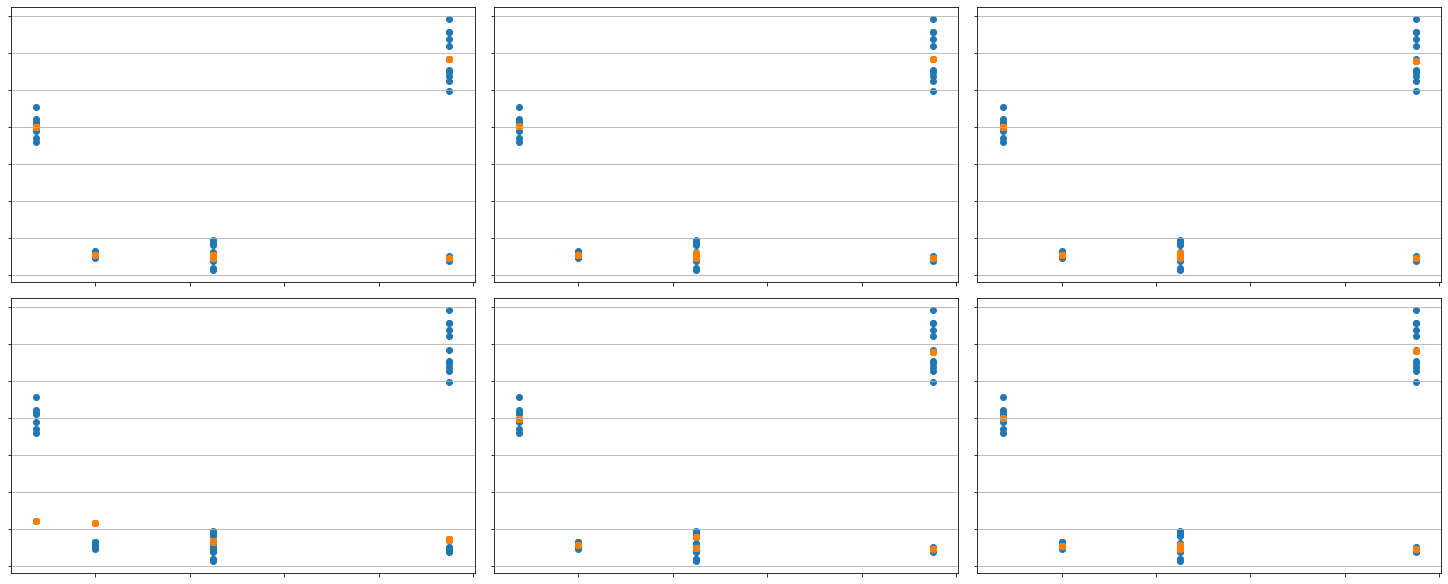

In [6]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = dataset_tool.get_ins_feature()
ctx["target_feature"] = "avg_lat_read"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"memcached": df})

adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+-----------+-----+-----+-----+------+-------+-----+------+--------+-------+
|   False   |  lr | knn |  rf | svm  | svm_k |  nn | best | oracle | naive |
+-----------+-----+-----+-----+------+-------+-----+------+--------+-------+
| memcached | 5.6 | 5.9 | 6.4 | 56.6 |  5.8  | 5.7 | 5.6  |  5.5   |  54.7 |
+-----------+-----+-----+-----+------+-------+-----+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

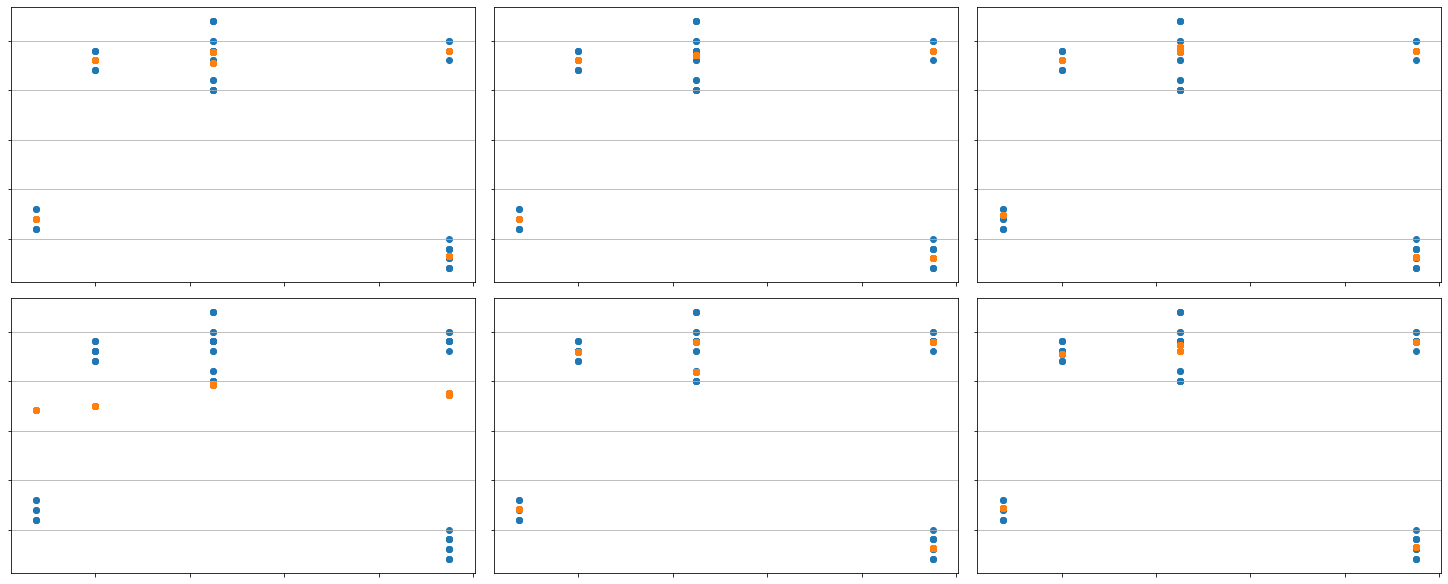

In [7]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = dataset_tool.get_ins_feature()
ctx["target_feature"] = "rx_goodput"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"memcached": df})